In [46]:
from PIL import Image
import numpy as np
import zarr
from matplotlib import pyplot as plt
import torch


%load_ext autoreload
%autoreload 2

# Models

Here we will test various models to understand which is better to use

## Load Image

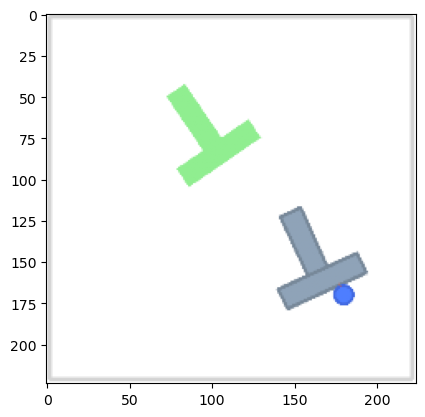

In [38]:
dataset = zarr.open("../data/demonstrations_snapshot_1.zarr", mode="r")

image = dataset["data"]["img"][33:37] # [224, 224, 3] with values in range [0-255]

plt.imshow(image[0]/ 255)

## Clip Visual Transformer

In [39]:
from transformers import CLIPProcessor, CLIPModel

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

inputs = clip_processor(images=image, return_tensors="pt", padding=True)

In [40]:
with torch.no_grad():
    image_features = clip_model.get_image_features(**inputs)

image_features = image_features.detach().cpu().numpy()

image_features.shape

(4, 512)

In [41]:
clip_model.config.projection_dim

512

In [49]:
from robotics.model_src.visual_encoder import CLIPVisualEncoder

model = CLIPVisualEncoder()

In [50]:
embeddings = model.encode(image)

33
